<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/IonQ_quantum_hello_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantum Hello World!

## IonQ Quantum Leadership Training Program (SK '23)

### Willie Aboumrad (aboumrad@ionq.co)

In [14]:
# Install necessary packages
!pip install qiskit
!pip install qiskit_ionq
!pip install qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 96.3 MB/s eta 0:00:00


# Quantum coin flip

Gate-based quantum computers perform computations by transforming information over quantum circuits. In this lecture we will introduce the formalism for designing quantum circuits, we will implement our very own quantum circuit, and we will run it on IonQ's quantum hardware!

In particular, we will construct circuits designed to generate truly random numbers.

To begin, we re-visit some important concepts introduced in Lecture 1.

### Superposition

The basic unit of information is a bit, which is a single binary digit. In quantum computing, we use quantum bits, or *qubits*. Mathematically, a qubit corresponds to a two-dimensional vector space, which we typically model as $\mathbb{C}^2$. The state of a qubit is represented by a unit vector in $\mathbb{C}^2$.

Whereas a classical bit can only take the two states $0$ and $1$, a qubit can take on infinitely many states. In particular the state of a qubit can be any vector
$$|\psi\rangle = \alpha |0 \rangle + \beta|1 \rangle,$$
with $\alpha, \beta$ complex numbers satisfying
$$|\alpha|^2 + |\beta|^2 = 1.$$
The complex coefficients $\alpha, \beta$ are known as *amplitudes*. Here we've chosen some basis of $\mathbb{C}^2$ and labeled its two elements by $|0 \rangle$ and $|1 \rangle$. This is known as the *computational basis*.

Thus as we process qubits in quantum circuits, their state is usually neither $0$, nor $1$; rather, the state is some linear combination of the two. The state described by such a linear combination is known as a *superposition*.

### Measurement

The state of a qubit collapses to one of the definite outcomes ($0$ or $1$) only when we perform a measurement. In this case, we observe each outcome with probability proportional to the squared length of the amplitude of the corresponding basis state. Concretely, when measuring a qubit in state $|\psi\rangle = \alpha |0 \rangle + \beta|1 \rangle$, the probability of observing the outcome $0$ is $|\alpha|^2$.

### Quantum hello world: flipping coins

We now leverage the superposition and measurment properties to design a quantum circuit that generates truly random numbers drawn from $\{0, 1\}$.

To construct our first circuit, we will need the *Hadamard gate*. Every quantum gate is characterized by its action on the basis states $|0\rangle$ and $|1\rangle$. For instance, the Hadamard gate implements the transformation
$$|0\rangle \to \frac{1}{\sqrt{2}}\big(|0\rangle + |1\rangle\big)$$
and
$$|1\rangle \to \frac{1}{\sqrt{2}}\big(|0\rangle - |1\rangle\big).$$

The action of all quantum gates is extended to superpositions linearly. In other words, the action of each gate is represented by a linear transformation, i.e. a matrix. This means that quantum circuits can be represented as a product of matrices.

Let's jump into our first circuit!

In [31]:
# Import the Qiskit development framework
from qiskit import QuantumCircuit

# Set up a quantum circuit with 1 qubit and 1 classical bit register
qc = QuantumCircuit(1, 1)

# Add a Hadamard gate acting on the 0th qubit
#qc.x(0)
qc.h(0)

# Measure the 0th qubit and record the result in the 0th classical register
qc.measure([0], [0])

# Visualize the quantum circuit
qc.draw(initial_state=True)

┌───┐┌─┐
 q: |0>┤ H ├┤M├
       └───┘└╥┘
c: 0 1/══════╩═
             0

In [43]:
# Set up a simulator backend to run the quantum circuit
from qiskit import Aer
simulator_backend = Aer.get_backend("aer_simulator")

# Run the circuit over 100 shots
#result = simulator_backend.run(qc, shots=100).result()
#counts = result.get_counts()
counts = simulator_backend.run(qc, shots=100).result().get_counts()

# Inspect the result
counts

{'0010 0000': 4,
 '0011 0000': 4,
 '1001 0000': 2,
 '1111 0000': 8,
 '1000 0000': 5,
 '1100 0000': 7,
 '1010 0000': 6,
 '1110 0000': 9,
 '0001 0000': 6,
 '1011 0000': 7,
 '0100 0000': 4,
 '0000 0000': 6,
 '0111 0000': 8,
 '0101 0000': 7,
 '1101 0000': 11,
 '0110 0000': 6}

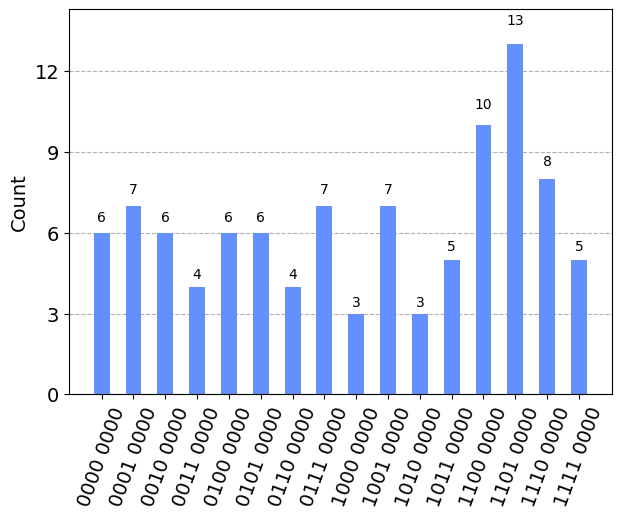

In [46]:
from qiskit.visualization import plot_histogram

# Visualize the results!
plot_histogram(counts)

##### Question: Can you explain the results? What does the theory tell us to expect?

##### Let's run the same circuit on an actual QPU!

We'll use the IonQ Harmony system here.

In [42]:
# We will use the following API this lecture. In the future, you can
# request your own API key by creating your own account with IonQ's
# cloud provider
API_KEY = "xdNnUQmVTZyZ8ox7pHvPuU6qY5te9K8c"

# Load IonQ's Qiskit API
from qiskit_ionq import IonQProvider

# Set up the IonQ Cloud provider
provider = IonQProvider(token=API_KEY)

# Request a simulator backend
simulator_backend = provider.get_backend("ionq_simulator")

# Optionally, select a QPU noise model
# By default, we run an ideal simulation
# simulator_backend.options.noise_model = 'harmony'

# Get the QPU backend
#harmony_backend = provider.get_backend("ionq_qpu.harmony")

# Submit the job
job = harmony_backend.run(qc, shots=100)

In [30]:
from time import sleep

# Periodically check the job status
for k in range(5):
    sleep(30) # wait 30 seconds...
    print(job.status())

JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED


#### Now it's your turn!

Design a quantum circuit that can be used to generate uniformly distributed truly random numbers in the range $[0, 16)$.

In [44]:
# Implement your circuit here

# Import the Qiskit development framework
from qiskit import QuantumCircuit

# Set up a quantum circuit with 1 qubit and 1 classical bit register
qc = QuantumCircuit(4, 4)

qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)

# Measure the 0th qubit and record the result in the 0th classical register
qc.measure_all()

# Visualize the quantum circuit
qc.draw(initial_state=True)

┌───┐ ░ ┌─┐         
  q_0: |0>┤ H ├─░─┤M├─────────
          ├───┤ ░ └╥┘┌─┐      
  q_1: |0>┤ H ├─░──╫─┤M├──────
          ├───┤ ░  ║ └╥┘┌─┐   
  q_2: |0>┤ H ├─░──╫──╫─┤M├───
          ├───┤ ░  ║  ║ └╥┘┌─┐
  q_3: |0>┤ H ├─░──╫──╫──╫─┤M├
          └───┘ ░  ║  ║  ║ └╥┘
   c: 0 4/═════════╬══╬══╬══╬═
                   ║  ║  ║  ║ 
meas: 0 4/═════════╩══╩══╩══╩═
                   0  1  2  3

In [45]:
# Set up a simulator backend to run the quantum circuit
from qiskit import Aer
simulator_backend = Aer.get_backend("aer_simulator")

# Run the circuit over 100 shots
#result = simulator_backend.run(qc, shots=100).result()
#counts = result.get_counts()
counts = simulator_backend.run(qc, shots=100).result().get_counts()

# Inspect the result
counts


{'1000 0000': 3,
 '0101 0000': 6,
 '1001 0000': 7,
 '1111 0000': 5,
 '1100 0000': 10,
 '1010 0000': 3,
 '1110 0000': 8,
 '0001 0000': 7,
 '0111 0000': 7,
 '0110 0000': 4,
 '1101 0000': 13,
 '1011 0000': 5,
 '0100 0000': 6,
 '0000 0000': 6,
 '0010 0000': 6,
 '0011 0000': 4}

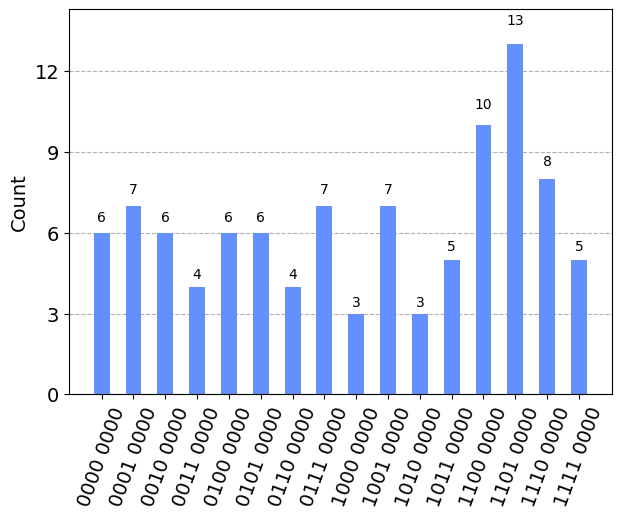

In [47]:
from qiskit.visualization import plot_histogram

# Visualize the results!
plot_histogram(counts)

#### Let's interpret our results now. What does 1001 mean? Compare your results with our previous experiment. What's different and why?

Qiskit은 왼쪽에서 오른쪽으로 읽고
1001(q3, q2, q1, q0)<br>
8x1+4x0+2x0+1x1=9

### Entanglement

Let's try another circuit now. This one will illustrate the quantum mechanical phenomenon known as *entanglement*, which was also introduced in Lecture 1. Loosely, entanglement enables qubits to interact with each other by supporting correlated states.

Concretely, entanglement arises as follows. Consider two qubits, each represented by a copy of $\mathbb{C}^2$. Then the state space for the combined two-qubit system is given by the *tensor product* $\mathbb{C}^2 \otimes \mathbb{C}^2$. The computational basis is the *tensor product basis*
$$|00\rangle = |0\rangle \otimes |0\rangle,$$
$$|01\rangle = |0\rangle \otimes |1\rangle,$$
$$|10\rangle = |1\rangle \otimes |0\rangle,$$
and
$$|11\rangle = |1\rangle \otimes |1\rangle.$$

There is a subspace of *separable* or *product* states of the form
$$|\psi\rangle = |\psi_1\rangle \otimes |\psi_2\rangle,$$
where each $|\psi_i\rangle$ is a *pure state*. For example, the state
$$
\frac{1}{\sqrt{2}}|01\rangle + \frac{1}{\sqrt{2}}|11\rangle
= \bigg(\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle\bigg)
\otimes |1\rangle
$$
is separable.

States which are *not* separable are said to be *entangled*. For instance, the state
$$|\varphi\rangle = \frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle$$
is entangled.

##### See for yourself! Try to write $|\varphi\rangle$ as a product of single-qubit states.

In particular, $|\varphi\rangle$ is maximally entangled: it is known as a Bell state.

Let's prepare $|\varphi\rangle$ on a quantum computer.

In [48]:
# Construct a quantum circuit with 2 qubits and 2 classical bit registers
qc = QuantumCircuit(2, 2)

# Add a Hadamard gate on the 0th qubit
qc.h(0)

# Add an entangling CNOT gate on the 0th and 1st qubits
qc.cnot(0, 1)

# Measure the output
qc.measure([0, 1], [0, 1])

# Draw the circuit
qc.draw(initial_state=True)

┌───┐     ┌─┐   
q_0: |0>┤ H ├──■──┤M├───
        └───┘┌─┴─┐└╥┘┌─┐
q_1: |0>─────┤ X ├─╫─┤M├
             └───┘ ║ └╥┘
 c: 0 2/═══════════╩══╩═
                   0  1

In [49]:
# Run the circuit over 100 shots
result = simulator_backend.run(qc, shots=100).result()
# result = harmony_backend.run(qc, shots=100).result()
counts = result.get_counts()

# Inspect the result
counts

{'00': 56, '11': 44}

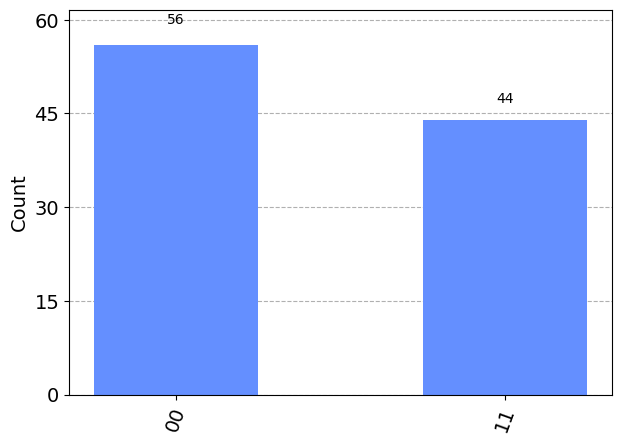

In [50]:
# Visualize the results!
plot_histogram(counts)

## Bonus: Quantum Half Adder

Here we'll re-visit the classical half-adder. We will use quantum gates to construct an equivalent quantum circuit. In particular, we will use a combination of CNOT gates to reproduce the XOR logic. We will also need a Toffoli or CCNOT gate to mimic the AND logic.

In [ ]:
# Import the Qiskit development framework
from qiskit import QuantumCircuit

# Set up a quantum circuit with 4 qubits and 2 classical bit register
qc = QuantumCircuit(2 + 2, 2)

# Change the initial state to 11
qc.x(0)
qc.x(1)
qc.barrier()

# Use CNOT gates to write the XOR of the inputs on qubit 2

#####################
### Fill this in! ###
#####################

# Add a missing gate here! Hint: check out the Toffoli or CCNOT gate

#####################
### Fill this in! ###
#####################

# Measure relevant qubits into classical registers
qc.barrier()
qc.measure(2, 0) # extract XOR value
qc.measure(3, 1) # extract AND value

# Visualize the quantum circuit
qc.draw(initial_state=True, output='mpl')

## Bonus: Re-writing your circuit using only one- and two-qubit gates

Now we re-visit the question of universality and the (limited) collection of gates that can actually be implemented on quantum hardware. Recall that in our discussion of classical circuits we noted that the NAND gate is universal for classical computation, and in fact, it is the only gate that is available on most modern chips.

In the quantum case, only one- and two-qubit gates are available natively on quantum processors. Thus we must decompose three- and higher-qubit gates into sequences of two-qubit gates. For this exercise, do some research online and construct a sequence of two-qubit gates that implements the Toffoli gate.

In [ ]:
# Import the QuantumCircuit class
from qiskit import QuantumCircuit

# A quantum circuit with 3 qubits
qc = QuantumCircuit(3)
qc.ccx(0, 1, 2)
qc.draw()

q_0: ──■──
       │  
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘

In [ ]:
# Now it's your turn! Implement the qc above using only two-qubit gates
# Use the least number of gates you can!

#####################
### Fill this in! ###
#####################
